# 函数API实现wide&deep

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in np, pd ,sklearn, tf, keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)



.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test=train_test_split(housing.data, housing.target,random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all,y_train_all,random_state=11)

In [4]:
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
x_train_scaled = transfer.fit_transform(x_train)
x_test_scaled = transfer.transform(x_test)
x_valid_scaled = transfer.transform(x_valid)

In [5]:
#函数式API
input = keras.layers.Input(shape=x_train.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
#复合函数fx = h(f(x(g)))

cancat = keras.layers.concatenate([input, hidden2])#用concatenate把两个层连接起来
output = keras.layers.Dense(1)(cancat)
e

model.compile(loss='mean_squared_error',
             optimizer = 'nadam',# SGD -> SGDM -> NAG ->AdaGrad -> AdaDelta -> Adam -> Nadam
             )


In [6]:
model.layers#查看模型层数

In [7]:
model.summary()#d 模型参数

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [8]:
callbacks = [keras.callbacks.EarlyStopping(patience=0,min_delta=1e-2)]
history = model.fit(x_train_scaled,y_train,epochs=100,
                   validation_data=(x_valid_scaled,y_valid),
                   callbacks= callbacks 
                   )
#validation_data:训练过程中在验证集验证

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 6s 480us/sample - loss: 1.6821 - val_loss: 0.5889
Epoch 2/100
11610/11610 [==============================] - 2s 200us/sample - loss: 0.4853 - val_loss: 0.4457
Epoch 3/100
11610/11610 [==============================] - 2s 201us/sample - loss: 0.4013 - val_loss: 0.4069
Epoch 4/100
11610/11610 [==============================] - 2s 200us/sample - loss: 0.3833 - val_loss: 0.3899
Epoch 5/100
11610/11610 [==============================] - 2s 200us/sample - loss: 0.3751 - val_loss: 0.3798
Epoch 6/100
11610/11610 [==============================] - 2s 215us/sample - loss: 0.3603 - val_loss: 0.3878
Epoch 7/100
11610/11610 [==============================] - 2s 205us/sample - loss: 0.3530 - val_loss: 0.3754
Epoch 8/100
11610/11610 [==============================] - 2s 203us/sample - loss: 0.3603 - val_loss: 0.3987
Epoch 9/100
11610/11610 [==============================] - 2s 206us/sample - lo

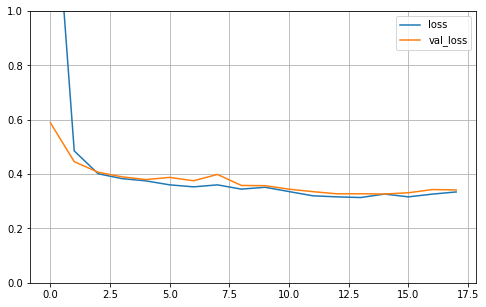

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8,5])
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [20]:

model.evaluate(x_test_scaled, y_test, 
               verbose=2
              )

# print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

5160/1 - 0s - loss: 0.4262


0.3358000552931497